In [1]:
# Imports
import numpy as np
import pandas as pd

from scipy.spatial import distance
# from sklearn.preprocessing import MinMaxScaler

# pip3 install pandas ipython jupyter


In [2]:
# Alumnos

STUDENTS_CSV = 'input/students.csv'
COMPANIES_CSV = 'input/companies.csv'

def csv2dataframe(path): 
    return pd.read_csv(path, sep=',', index_col=0, lineterminator='\n')

def adquisition(): 
    students = csv2dataframe(STUDENTS_CSV)
    companies = csv2dataframe(COMPANIES_CSV)
    return students, companies

students, companies = adquisition()

# display(students), display(companies)

In [3]:
# normalizacion. Por columnas en alumnos o empresas hay un 0.0 y un 1.0

def normalize_2dfs(students, companies): 
    
    mins = [min(s, c) for s, c in zip(students.min(), companies.min())]
    students = students-mins
    companies = companies-mins
    
    maxs = [max(s, c) for s, c in zip(students.max(), companies.max())]
    students = students/maxs
    companies = companies/maxs
    
    return students, companies

students_norm, companies_norm = normalize_2dfs(students, companies)
# display(students_norm), display(companies_norm)

In [4]:
# Matching

# PESOS = (alumnos.columns)

P = [2,1,1,1,3,1,1,1,1,5]
W = {col: p for col, p in zip(students_norm.columns, P)}


def calc_dist(s_array, c_array, weights_val): 
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine
    return calc_match(distance.euclidean(s_array, c_array, weights_val))

def calc_match(distance): 
    return 1/(1+distance)

def match(student, company, weights=W): 
    return calc_dist(student, company, list(weights.values()))

In [5]:
# match(students_norm.loc['alumno1'], companies_norm.loc['empresa1'])

# Emparejamiento

En cada ronda se crea una pareja alumno-empresa empezando por el mejor %. Luego se pasa al siguente alumno. Si la empresa que hacía mejor match es la del caso anterior, pasa a su segundo mejor match, etc. 

En cada ronda se cambia el estudiante que elige primero, entre los que no han ido primeros

In [6]:
# !jupyter kernelspec list
# import sys
# sys.path

In [7]:
# create dataframe de tamañ0 SxC

matching = pd.DataFrame(np.zeros((len(students), len(companies))) , columns=companies.index, index=students.index)
matching.head()

empresas,empresa1,empresa2,empresa3,empresa4,empresa5,empresa6,empresa7,empresa8,empresa9,empresa10,...,empresa21,empresa22,empresa23,empresa24,empresa25,empresa26,empresa27,empresa28,empresa29,empresa30
alumnos,,,,,,,,,,,,,,,,,,,,,
alumno1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alumno2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alumno3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alumno4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alumno5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
matching.index, matching.columns

(Index(['alumno1', 'alumno2', 'alumno3', 'alumno4', 'alumno5', 'alumno6',
        'alumno7', 'alumno8', 'alumno9', 'alumno10', 'alumno11', 'alumno12',
        'alumno13', 'alumno14', 'alumno15', 'alumno16', 'alumno17', 'alumno18',
        'alumno19', 'alumno20', 'alumno21', 'alumno22', 'alumno23', 'alumno24',
        'alumno25', 'alumno26', 'alumno27', 'alumno28', 'alumno29', 'alumno30'],
       dtype='object', name='alumnos'),
 Index(['empresa1', 'empresa2', 'empresa3', 'empresa4', 'empresa5', 'empresa6',
        'empresa7', 'empresa8', 'empresa9', 'empresa10', 'empresa11',
        'empresa12', 'empresa13', 'empresa14', 'empresa15', 'empresa16',
        'empresa17', 'empresa18', 'empresa19', 'empresa20', 'empresa21',
        'empresa22', 'empresa23', 'empresa24', 'empresa25', 'empresa26',
        'empresa27', 'empresa28', 'empresa29', 'empresa30'],
       dtype='object', name='empresas'))

In [9]:
# matching.loc['alumno1', 'empresa3']

def calculate_match(matching, df1, df2): 
    # matching = pd.DataFrame(np.zeros((len(students), len(companies))) , columns=companies.index, index=students.index)

    for a in matching.index: 
        for c in matching.columns:
            # print(a, c)
            matching.loc[a, c] = match(df1.loc[a], df2.loc[c])
    return matching

matching = calculate_match(matching, students_norm, companies_norm)

# matching es una matriz de elementos entre [0, 1]
# matching.min().min(), matching.max().max()

matching

empresas,empresa1,empresa2,empresa3,empresa4,empresa5,empresa6,empresa7,empresa8,empresa9,empresa10,...,empresa21,empresa22,empresa23,empresa24,empresa25,empresa26,empresa27,empresa28,empresa29,empresa30
alumnos,,,,,,,,,,,,,,,,,,,,,
alumno1,1.000000,0.353046,0.195194,1.000000,0.353046,0.195194,1.000000,0.353046,0.195194,1.000000,...,1.000000,0.353046,0.195194,1.000000,0.353046,0.195194,1.000000,0.353046,0.195194,0.685813
alumno2,0.353046,1.000000,0.303895,0.353046,1.000000,0.303895,0.353046,1.000000,0.303895,0.353046,...,0.353046,1.000000,0.303895,0.353046,1.000000,0.303895,0.353046,1.000000,0.303895,0.421165
alumno3,0.195194,0.303895,1.000000,0.195194,0.303895,1.000000,0.195194,0.303895,1.000000,0.195194,...,0.195194,0.303895,1.000000,0.195194,0.303895,1.000000,0.195194,0.303895,1.000000,0.214363
alumno4,1.000000,0.353046,0.195194,1.000000,0.353046,0.195194,1.000000,0.353046,0.195194,1.000000,...,1.000000,0.353046,0.195194,1.000000,0.353046,0.195194,1.000000,0.353046,0.195194,0.685813
alumno5,0.353046,1.000000,0.303895,0.353046,1.000000,0.303895,0.353046,1.000000,0.303895,0.353046,...,0.353046,1.000000,0.303895,0.353046,1.000000,0.303895,0.353046,1.000000,0.303895,0.421165
alumno6,0.195194,0.303895,1.000000,0.195194,0.303895,1.000000,0.195194,0.303895,1.000000,0.195194,...,0.195194,0.303895,1.000000,0.195194,0.303895,1.000000,0.195194,0.303895,1.000000,0.214363
alumno7,1.000000,0.353046,0.195194,1.000000,0.353046,0.195194,1.000000,0.353046,0.195194,1.000000,...,1.000000,0.353046,0.195194,1.000000,0.353046,0.195194,1.000000,0.353046,0.195194,0.685813
alumno8,0.353046,1.000000,0.303895,0.353046,1.000000,0.303895,0.353046,1.000000,0.303895,0.353046,...,0.353046,1.000000,0.303895,0.353046,1.000000,0.303895,0.353046,1.000000,0.303895,0.421165
alumno9,0.195194,0.303895,1.000000,0.195194,0.303895,1.000000,0.195194,0.303895,1.000000,0.195194,...,0.195194,0.303895,1.000000,0.195194,0.303895,1.000000,0.195194,0.303895,1.000000,0.214363


In [10]:
# create csv de pruebas

df_pruebas = matching.copy()
df1 = df_pruebas.head(10).copy()
df2 = df_pruebas.head(20).copy()
df3 = df_pruebas.copy()

# Grafos

In [11]:
import networkx as nx
import matplotlib

# https://networkx.github.io/documentation/networkx-1.10/reference/introduction.html

def create_graph(df): 
    G_res=nx.Graph()
    for a in df.index: 
        for e in df.columns: 
            G_res.add_edge(a,e,weight=df.loc[a][e])
    return G_res

def plot_bipartite_graph(G): 
    X, Y = df1.index, df1.columns
    pos = dict()
    pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
    pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
    nx.draw(G, pos=pos)



G = create_graph(df1)
students = df1.index
companies = df1.columns
plot_bipartite_graph(G)

/home/alberto/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [12]:
len(G.edges)
# G.remove_edge('empresa4','alumno1')
len(G)
len(G.edges)
list(G.edges)

[('alumno1', 'empresa1'),
 ('alumno1', 'empresa2'),
 ('alumno1', 'empresa3'),
 ('alumno1', 'empresa4'),
 ('alumno1', 'empresa5'),
 ('alumno1', 'empresa6'),
 ('alumno1', 'empresa7'),
 ('alumno1', 'empresa8'),
 ('alumno1', 'empresa9'),
 ('alumno1', 'empresa10'),
 ('alumno1', 'empresa11'),
 ('alumno1', 'empresa12'),
 ('alumno1', 'empresa13'),
 ('alumno1', 'empresa14'),
 ('alumno1', 'empresa15'),
 ('alumno1', 'empresa16'),
 ('alumno1', 'empresa17'),
 ('alumno1', 'empresa18'),
 ('alumno1', 'empresa19'),
 ('alumno1', 'empresa20'),
 ('alumno1', 'empresa21'),
 ('alumno1', 'empresa22'),
 ('alumno1', 'empresa23'),
 ('alumno1', 'empresa24'),
 ('alumno1', 'empresa25'),
 ('alumno1', 'empresa26'),
 ('alumno1', 'empresa27'),
 ('alumno1', 'empresa28'),
 ('alumno1', 'empresa29'),
 ('alumno1', 'empresa30'),
 ('empresa1', 'alumno2'),
 ('empresa1', 'alumno3'),
 ('empresa1', 'alumno4'),
 ('empresa1', 'alumno5'),
 ('empresa1', 'alumno6'),
 ('empresa1', 'alumno7'),
 ('empresa1', 'alumno8'),
 ('empresa1', 'al

In [13]:
# sort por peso DESCENCENTE

def get_best_match(G, node): 
    # sort por peso DESCENCENTE
    for edge in sorted(G.edges(data=True), key=lambda x: - x[2]['weight']):
        if node in edge: 
            return edge
        
node1, node2, w = get_best_match(G, 'empresa30')
node1, node2, w

('alumno1', 'empresa30', {'weight': 0.6858132713975165})

In [14]:
RONDAS = 10
MESAS = min(len(students), len(companies))
MESAS

10

# más alumnos que empresas

In [15]:
rondas = []

for ronda in range(RONDAS): 
    aux = []
    for company in companies: 
        print(company)
        node1, node2, w = get_best_match(G, company)
        print(node1, node2, w)
        aux.append((node1, node2, w))
        G.remove_edge(node1, node2)
    rondas.append(aux)
rondas


empresa1
alumno1 empresa1 {'weight': 1.0}
empresa2
empresa2 alumno2 {'weight': 1.0}
empresa3
empresa3 alumno3 {'weight': 1.0}
empresa4
alumno1 empresa4 {'weight': 1.0}
empresa5
empresa5 alumno2 {'weight': 1.0}
empresa6
empresa6 alumno3 {'weight': 1.0}
empresa7
alumno1 empresa7 {'weight': 1.0}
empresa8
empresa8 alumno2 {'weight': 1.0}
empresa9
empresa9 alumno3 {'weight': 1.0}
empresa10
alumno1 empresa10 {'weight': 1.0}
empresa11
alumno1 empresa11 {'weight': 1.0}
empresa12
empresa12 alumno2 {'weight': 1.0}
empresa13
empresa13 alumno3 {'weight': 1.0}
empresa14
alumno1 empresa14 {'weight': 1.0}
empresa15
empresa15 alumno2 {'weight': 1.0}
empresa16
empresa16 alumno3 {'weight': 1.0}
empresa17
alumno1 empresa17 {'weight': 1.0}
empresa18
empresa18 alumno2 {'weight': 1.0}
empresa19
empresa19 alumno3 {'weight': 1.0}
empresa20
alumno1 empresa20 {'weight': 1.0}
empresa21
alumno1 empresa21 {'weight': 1.0}
empresa22
empresa22 alumno2 {'weight': 1.0}
empresa23
empresa23 alumno3 {'weight': 1.0}
empres

[[('alumno1', 'empresa1', {'weight': 1.0}),
  ('empresa2', 'alumno2', {'weight': 1.0}),
  ('empresa3', 'alumno3', {'weight': 1.0}),
  ('alumno1', 'empresa4', {'weight': 1.0}),
  ('empresa5', 'alumno2', {'weight': 1.0}),
  ('empresa6', 'alumno3', {'weight': 1.0}),
  ('alumno1', 'empresa7', {'weight': 1.0}),
  ('empresa8', 'alumno2', {'weight': 1.0}),
  ('empresa9', 'alumno3', {'weight': 1.0}),
  ('alumno1', 'empresa10', {'weight': 1.0}),
  ('alumno1', 'empresa11', {'weight': 1.0}),
  ('empresa12', 'alumno2', {'weight': 1.0}),
  ('empresa13', 'alumno3', {'weight': 1.0}),
  ('alumno1', 'empresa14', {'weight': 1.0}),
  ('empresa15', 'alumno2', {'weight': 1.0}),
  ('empresa16', 'alumno3', {'weight': 1.0}),
  ('alumno1', 'empresa17', {'weight': 1.0}),
  ('empresa18', 'alumno2', {'weight': 1.0}),
  ('empresa19', 'alumno3', {'weight': 1.0}),
  ('alumno1', 'empresa20', {'weight': 1.0}),
  ('alumno1', 'empresa21', {'weight': 1.0}),
  ('empresa22', 'alumno2', {'weight': 1.0}),
  ('empresa23', 'al

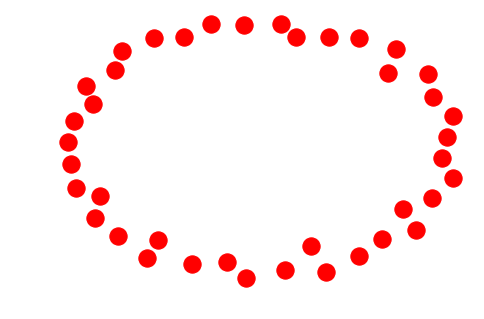

In [16]:
nx.draw(G)